<a href="https://colab.research.google.com/github/YUCAVALCANTE/Tutorials_Linkedin/blob/main/Regress%C3%A3o_Log%C3%ADstica_para_Prever_Atrasos_de_Voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como Usar a Regressão Logística para Prever Atrasos de Voos: Um Exemplo Prático em Python

In [11]:
import pandas as pd
import numpy as np

np.random.seed(13)  # Define a semente do gerador de números aleatórios para garantir a reprodutibilidade dos resultados
n_samples = 8000  # Definindo o número de amostras

# Gerando dados
data = {
    'Hora do Voo': np.random.randint(0, 24, n_samples),
    'Clima': np.random.choice(['Ensolarado', 'Nublado', 'Chuvoso', 'Tempestuoso'], n_samples),
    'Atrasado': np.random.choice([0, 1], n_samples, p=[0.6, 0.4])
}
df = pd.DataFrame(data)

# Adicionando mais algumas características
df['Tipo de Aeronave'] = np.random.choice(['A320', 'B737', 'E190'], size=n_samples)
df['Aeroporto de Origem'] = np.random.choice(['GRU', 'SSA', 'REC' , 'BEL', 'JFK', 'LHR'], size=n_samples)
df['Dia da Semana'] = np.random.choice(['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], size=n_samples)

df = pd.get_dummies(df, drop_first=True)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df.drop('Atrasado', axis=1)
target = df['Atrasado']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [18]:
predictions = model.predict(X_test_scaled)  # Previsões diretas
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para a classe de interesse

In [19]:
accuracy = accuracy_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, probabilities)

print(f'Precisão do Modelo: {accuracy}')
print(f'AUC-ROC: {auc_roc}')

Precisão do Modelo: 0.5925
AUC-ROC: 0.48782875152079935


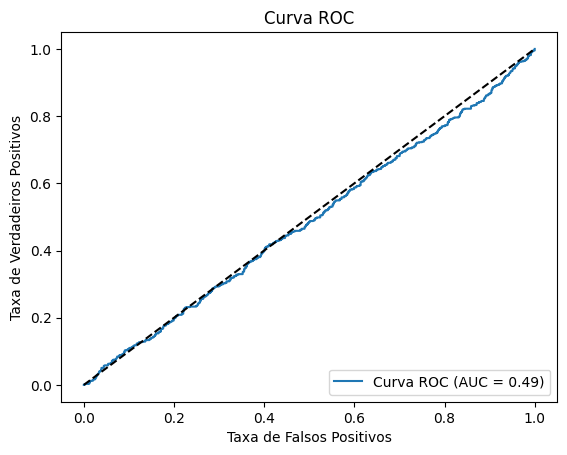

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Linha da chance, como referência
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()